# Introducción a Pandas y Matplotlib

## 1. Pandas

Pandas es una librería de Python diseñada para trabajar con datos de forma eficiente.
Permite cargar, transformar, limpiar y analizar información en estructuras como:

* Series (una sola columna)
* DataFrames (tabla con filas y columnas)

Es muy usada en análisis de datos, ciencia de datos y machine learning.

### 1.1 Crear Series

Una Serie es como una columna de datos.

In [ ]:
import pandas as pd

s = pd.Series([10, 20, 30, 40])
s

,0
0,10
1,20
2,30
3,40


### 1.2 Crear DataFrames

Un DataFrame es una tabla de datos con filas y columnas.

In [ ]:
# Crear un dataFrame vacío
df = pd.DataFrame()
df

""


In [ ]:
# Agregar elementos al dataframe
# append fue deprecado, sin embargo la instrucción solía ser df.append({"Nombre": "Ana", "Edad": 23}
df.loc[0, 'Nombre'] = 'Juan'
df.loc[1, 'Nombre'] = 'Maria'
df

,Nombre
0,Juan
1,Maria


In [88]:
# Utilizando concat
df = pd.DataFrame(columns=["Nombre", "Edad"])

nueva_fila = pd.DataFrame([{"Nombre": "Ana", "Edad": 23}])
df = pd.concat([df, nueva_fila], ignore_index=True)

nueva_fila = pd.DataFrame([{"Nombre": "Luis", "Edad": 30}])
df = pd.concat([df, nueva_fila], ignore_index=True)

df

,Nombre,Edad
0,Ana,23
1,Luis,30


In [29]:
# Crear un dataframe con datos iniciales
df2 = pd.DataFrame({
    'Nombre': ['Mario', 'Juan', 'Pedro'],
    'Edad': [14, 12, 52],
    'Ciudad': ['Guatemala', 'Mixco', 'Quetzaltenango']
})

df2

,Nombre,Edad,Ciudad
0,Mario,14,Guatemala
1,Juan,12,Mixco
2,Pedro,52,Quetzaltenango


### 1.3 Manipulación de Columnas

Incluye renombrar, crear nuevas columnas, eliminar columnas, modificar tipos, aplicar funciones, etc.

In [ ]:
### Renombrar columnas
df2 = df2.rename(columns={'Nombre': 'Nombre_completo'})
df2

,Nombre_completo,Edad,Ciudad
0,Mario,14,Guatemala
1,Juan,12,Mixco
2,Pedro,52,Quetzaltenango


In [ ]:
# Crear una nueva columna
df2['Edad_duplicada'] = df2['Edad']*2
df2

,Nombre_completo,Edad,Ciudad,Edad_duplicada
0,Mario,14,Guatemala,28
1,Juan,12,Mixco,24
2,Pedro,52,Quetzaltenango,104


In [ ]:
# Eliminar columnas
df2 = df2.drop(columns=['Edad_duplicada'])
df2

,Nombre_completo,Edad,Ciudad
0,Mario,14,Guatemala
1,Juan,12,Mixco
2,Pedro,52,Quetzaltenango


In [21]:
# Aplicar una función a una columna
df2['Categoria'] = df2['Edad'].apply(lambda x: 'Mayor de edad' if x >= 18 else 'Menor de edad')
df2


,Nombre_completo,Edad,Ciudad,Categoria
0,Mario,14,Guatemala,Menor de edad
1,Juan,12,Mixco,Menor de edad
2,Pedro,52,Quetzaltenango,Mayor de edad


In [22]:
# Convertir tipos de datos
df2['Edad'] = df2['Edad'].astype('float')
df2

,Nombre_completo,Edad,Ciudad,Categoria
0,Mario,14.0,Guatemala,Menor de edad
1,Juan,12.0,Mixco,Menor de edad
2,Pedro,52.0,Quetzaltenango,Mayor de edad


In [30]:
df2

,Nombre,Edad,Ciudad
0,Mario,14,Guatemala
1,Juan,12,Mixco
2,Pedro,52,Quetzaltenango


In [32]:
df2.loc[0, 'Nombre'] = 'Mixco'
df2

,Nombre,Edad,Ciudad
0,Mixco,14,Guatemala
1,Juan,12,Mixco
2,Pedro,52,Quetzaltenango


In [33]:
# Reemplazar valores
df2 = df2.replace({'Mixco': 'Villa nueva'})
df2

,Nombre,Edad,Ciudad
0,Villa nueva,14,Guatemala
1,Juan,12,Villa nueva
2,Pedro,52,Quetzaltenango


### 1.3 Cargar datos desde un CSV

In [34]:
# Leer un archivo csv
df_lectura_csv = pd.read_csv('Cleaned_Students_Performance.csv')

In [36]:
# Mostrar las primeras n filas
df_lectura_csv.head(10)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average_score
0,0,group B,bachelor's degree,1,0,72,72,74,218,72.666667
1,0,group C,some college,1,1,69,90,88,247,82.333333
2,0,group B,master's degree,1,0,90,95,93,278,92.666667
3,1,group A,associate's degree,0,0,47,57,44,148,49.333333
4,1,group C,some college,1,0,76,78,75,229,76.333333
5,0,group B,associate's degree,1,0,71,83,78,232,77.333333
6,0,group B,some college,1,1,88,95,92,275,91.666667
7,1,group B,some college,0,0,40,43,39,122,40.666667
8,1,group D,high school,0,1,64,64,67,195,65.000000
9,0,group B,high school,0,0,38,60,50,148,49.333333


### 1.4 Selección de datos (filtrado)

In [37]:
# Seleccionar una columna
df['Nombre']

,Nombre
0,Juan
1,Maria


In [39]:
# Filtrar datos de una columna
df2[df2['Edad'] > 18]

,Nombre,Edad,Ciudad
2,Pedro,52,Quetzaltenango


In [42]:
# Filtrar con múltiples condiciones
df_filtrado = df_lectura_csv[(df_lectura_csv['race_ethnicity'] == 'group B') & (df_lectura_csv['lunch']> 0)]
df_filtrado

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average_score
0,0,group B,bachelor's degree,1,0,72,72,74,218,72.666667
2,0,group B,master's degree,1,0,90,95,93,278,92.666667
5,0,group B,associate's degree,1,0,71,83,78,232,77.333333
6,0,group B,some college,1,1,88,95,92,275,91.666667
12,0,group B,high school,1,0,65,81,73,219,73.000000
...,...,...,...,...,...,...,...,...,...,...
944,0,group B,high school,1,0,58,68,61,187,62.333333
946,1,group B,high school,1,0,82,82,80,244,81.333333
969,0,group B,bachelor's degree,1,0,75,84,80,239,79.666667
982,1,group B,some high school,1,1,79,85,86,250,83.333333


In [44]:
# Seleccionar filas por palabras clave
df_filtrado_palabras = df_lectura_csv[df_lectura_csv['parental_level_of_education'].str.contains('degree', na=False)]
df_filtrado_palabras

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average_score
0,0,group B,bachelor's degree,1,0,72,72,74,218,72.666667
2,0,group B,master's degree,1,0,90,95,93,278,92.666667
3,1,group A,associate's degree,0,0,47,57,44,148,49.333333
5,0,group B,associate's degree,1,0,71,83,78,232,77.333333
10,1,group C,associate's degree,1,0,58,54,52,164,54.666667
...,...,...,...,...,...,...,...,...,...,...
979,0,group C,associate's degree,1,0,91,95,94,280,93.333333
986,0,group C,associate's degree,1,0,40,59,51,150,50.000000
992,0,group D,associate's degree,0,0,55,76,76,207,69.000000
993,0,group D,bachelor's degree,0,0,62,72,74,208,69.333333


In [78]:
df2

,Nombre,Edad,Ciudad
0,Villa nueva,14,Guatemala
1,Juan,12,Villa nueva
2,Pedro,52,Quetzaltenango


In [86]:
# Filtrar por valores dentro de una lista
df_isin = df2[df2['Ciudad'].isin(['Villa nueva', 'zona 1'])] # Debe ser una coincidencia exacta con el contenido
df_isin

,Nombre,Edad,Ciudad
1,Juan,12,Villa nueva


### 1.5 Operaciones comunes

In [51]:
# Ver las estadísticas de las variables numéricas
df_lectura_csv.describe()

,gender,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average_score
count,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.482000,0.645000,0.358000,66.08900,69.169000,68.054000,203.312000,67.770667
std,0.499926,0.478753,0.479652,15.16308,14.600192,15.195657,42.771978,14.257326
min,0.000000,0.000000,0.000000,0.00000,17.000000,10.000000,27.000000,9.000000
25%,0.000000,0.000000,0.000000,57.00000,59.000000,57.750000,175.000000,58.333333
50%,0.000000,1.000000,0.000000,66.00000,70.000000,69.000000,205.000000,68.333333
75%,1.000000,1.000000,1.000000,77.00000,79.000000,79.000000,233.000000,77.666667
max,1.000000,1.000000,1.000000,100.00000,100.000000,100.000000,300.000000,100.000000


In [55]:
# Información general
df_lectura_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   gender                       1000 non-null   int64  
 1   race_ethnicity               1000 non-null   object 
 2   parental_level_of_education  1000 non-null   object 
 3   lunch                        1000 non-null   int64  
 4   test_preparation_course      1000 non-null   int64  
 5   math_score                   1000 non-null   int64  
 6   reading_score                1000 non-null   int64  
 7   writing_score                1000 non-null   int64  
 8   total_score                  1000 non-null   int64  
 9   average_score                1000 non-null   float64
dtypes: float64(1), int64(7), object(2)
memory usage: 78.3+ KB


In [58]:
# Ordenamiento de datos
df_ordendo = df_lectura_csv.sort_values('average_score', ascending=True)
df_ordendo

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average_score
59,0,group C,some high school,0,0,0,17,10,27,9.000000
980,0,group B,high school,0,0,8,24,23,55,18.333333
596,1,group B,high school,0,0,30,24,15,69,23.000000
327,1,group A,some college,0,0,28,23,19,70,23.333333
17,0,group B,some high school,0,0,18,32,28,78,26.000000
...,...,...,...,...,...,...,...,...,...,...
712,0,group D,some college,1,0,98,100,99,297,99.000000
114,0,group E,bachelor's degree,1,1,99,100,100,299,99.666667
962,0,group E,associate's degree,1,0,100,100,100,300,100.000000
916,1,group E,bachelor's degree,1,1,100,100,100,300,100.000000


### 1.6 Operaciones útiles para limpieza de datos

#### Manejo de Valores Nulos

Los valores nulos (NaN) representan datos faltantes. Pandas ofrece herramientas para:

* Detectarlos

* Eliminarlos

* Reemplazarlos

* Contarlos

In [59]:
# Detectar valores nulos
df_lectura_csv.isnull()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average_score
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
995,False,False,False,False,False,False,False,False,False,False
996,False,False,False,False,False,False,False,False,False,False
997,False,False,False,False,False,False,False,False,False,False
998,False,False,False,False,False,False,False,False,False,False


In [60]:
# Contar valores nulos por columna
df_lectura_csv.isnull().sum()

,0
gender,0
race_ethnicity,0
parental_level_of_education,0
lunch,0
test_preparation_course,0
math_score,0
reading_score,0
writing_score,0
total_score,0
average_score,0


In [61]:
# Eliminar filas con valores nulos
df_lectura_csv.dropna()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average_score
0,0,group B,bachelor's degree,1,0,72,72,74,218,72.666667
1,0,group C,some college,1,1,69,90,88,247,82.333333
2,0,group B,master's degree,1,0,90,95,93,278,92.666667
3,1,group A,associate's degree,0,0,47,57,44,148,49.333333
4,1,group C,some college,1,0,76,78,75,229,76.333333
...,...,...,...,...,...,...,...,...,...,...
995,0,group E,master's degree,1,1,88,99,95,282,94.000000
996,1,group C,high school,0,0,62,55,55,172,57.333333
997,0,group C,high school,0,1,59,71,65,195,65.000000
998,0,group D,some college,1,1,68,78,77,223,74.333333


In [62]:
# Rellenar filas con valores nulos
df_lectura_csv.fillna({
    'lunch': 0,
    'math_score': df_lectura_csv['math_score'].mean()
})

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average_score
0,0,group B,bachelor's degree,1,0,72,72,74,218,72.666667
1,0,group C,some college,1,1,69,90,88,247,82.333333
2,0,group B,master's degree,1,0,90,95,93,278,92.666667
3,1,group A,associate's degree,0,0,47,57,44,148,49.333333
4,1,group C,some college,1,0,76,78,75,229,76.333333
...,...,...,...,...,...,...,...,...,...,...
995,0,group E,master's degree,1,1,88,99,95,282,94.000000
996,1,group C,high school,0,0,62,55,55,172,57.333333
997,0,group C,high school,0,1,59,71,65,195,65.000000
998,0,group D,some college,1,1,68,78,77,223,74.333333


#### Manejo de Duplicados

A veces los datos contienen filas repetidas, lo que afecta análisis y modelos.

In [63]:
# Detectar duplicados
df_lectura_csv.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
995,False
996,False
997,False
998,False


In [64]:
# Eliminar duplicados
df_lectura_csv.drop_duplicates()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average_score
0,0,group B,bachelor's degree,1,0,72,72,74,218,72.666667
1,0,group C,some college,1,1,69,90,88,247,82.333333
2,0,group B,master's degree,1,0,90,95,93,278,92.666667
3,1,group A,associate's degree,0,0,47,57,44,148,49.333333
4,1,group C,some college,1,0,76,78,75,229,76.333333
...,...,...,...,...,...,...,...,...,...,...
995,0,group E,master's degree,1,1,88,99,95,282,94.000000
996,1,group C,high school,0,0,62,55,55,172,57.333333
997,0,group C,high school,0,1,59,71,65,195,65.000000
998,0,group D,some college,1,1,68,78,77,223,74.333333


In [68]:
# Eliminar duplicados basándose en columnas específicas
df_columna_duplicada = df_lectura_csv.drop_duplicates(subset=['race_ethnicity'])
df_columna_duplicada

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average_score
0,0,group B,bachelor's degree,1,0,72,72,74,218,72.666667
1,0,group C,some college,1,1,69,90,88,247,82.333333
3,1,group A,associate's degree,0,0,47,57,44,148,49.333333
8,1,group D,high school,0,1,64,64,67,195,65.000000
32,0,group E,master's degree,0,0,56,72,65,193,64.333333


## 2. Matplotlib

Matplotlib es una librería para crear gráficos en Python.
Permite generar visualizaciones como líneas, barras, scatter, histogramas, etc.

### Comandos más utilizados
* plt.plot(x, y) — gráfico de líneas
* plt.scatter(x, y) — gráfico de dispersión
* plt.hist(data) — histograma
* plt.title('Título') — añadir título
* plt.xlabel('Eje X') y plt.ylabel('Eje Y') — etiquetas de los ejes
* plt.show() — mostrar el gráfico

### 2.1 Crear un gráfico simple

In [69]:
import matplotlib.pyplot as plt

x = [1, 2, 3, 4]
y = [10, 20, 25, 30]

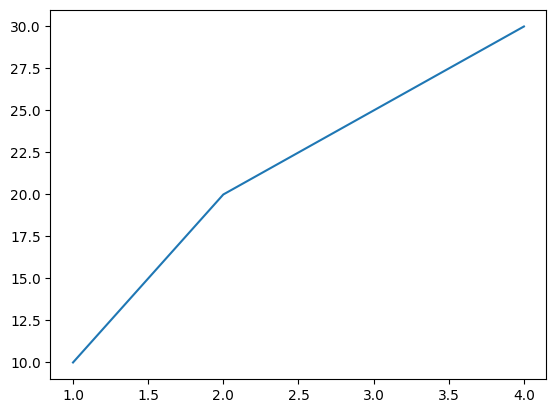

In [70]:
plt.plot(x, y)
plt.show()

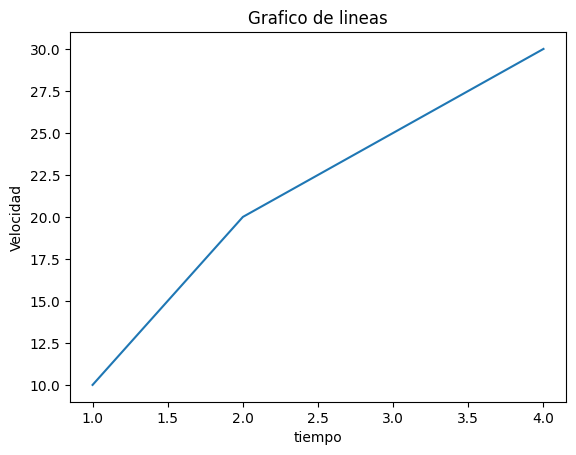

In [72]:
plt.plot(x, y)
plt.title('Grafico de lineas')
plt.xlabel('tiempo')
plt.ylabel('Velocidad')
plt.show()

### 2.2 Gráfico de barras

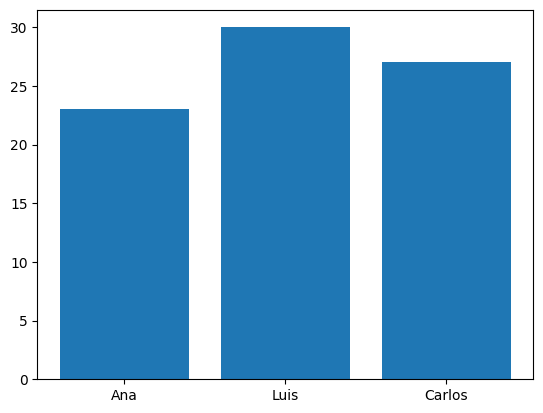

In [74]:
estudiantes = ["Ana", "Luis", "Carlos"]
notas = [23, 30, 27]

plt.bar(estudiantes, notas)
plt.show()

### 2.3 Histograma

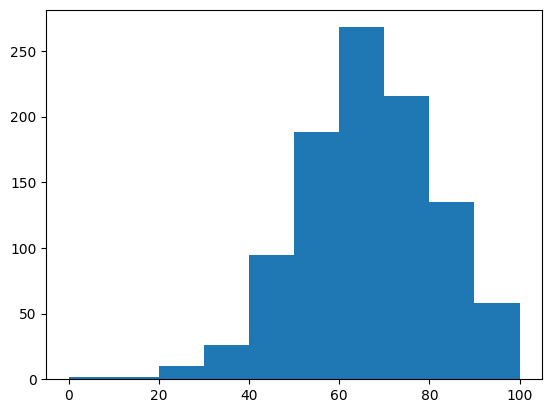

In [77]:
plt.hist(df_lectura_csv['math_score'])
plt.show()

### 2.4 Integración Pandas + Matplotlib

Pandas puede graficar directamente usando Matplotlib por detrás.

   Mes  Ventas
0  Ene     150
1  Feb     200
2  Mar     250
3  Abr     300


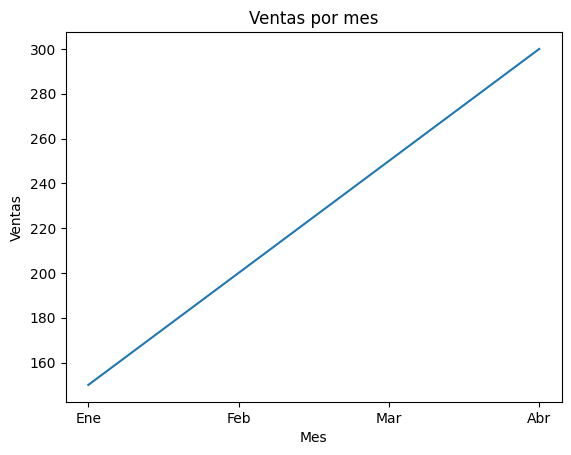

In [79]:
import pandas as pd
import matplotlib.pyplot as plt

# Dataset pequeño
data = {
    "Mes": ["Ene", "Feb", "Mar", "Abr"],
    "Ventas": [150, 200, 250, 300]
}

df3 = pd.DataFrame(data)

# Vista rápida
print(df3)

# Gráfico
plt.plot(df3["Mes"], df3["Ventas"])
plt.title("Ventas por mes")
plt.xlabel("Mes")
plt.ylabel("Ventas")
plt.show()
